In [2]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
from matplotlib import cm
from matplotlib.pyplot import plot,savefig
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import matplotlib.ticker as ticker
import os
import numpy as np
from scipy.optimize import curve_fit

In [ ]:
# map habitat of smORFs (data is too large to show here)
'''
def store_habitat(infile):
    import lzma
    habitat_dict = {}
    with lzma.open(infile,"rt") as f:
        for line in f:
            smorf,habitat = line.strip().split("\t")
            habitat_dict[smorf] = habitat
    return habitat_dict

def map_geo(habitat_dict,infile,outfile):
    import lzma
    with open(outfile,"wt") as out:
        with lzma.open(infile,"rt") as f:
            for line in f:
                smorf,location = line.strip().split("\t")
                location_list = location.split(" # ")
                if len(location_list) == 3:
                    latitude = location_list[1]
                    longitude = location_list[2]
                else:
                    latitude = "NA"
                    longitude = "NA"
                habitat_list = habitat_dict[smorf].split(",")
                for item in habitat_list:
                    out.write(f'{smorf}\t{latitude}\t{longitude}\t{item}\n')

infile1 = './data/figure3/100AA_multi_general_habitat.tsv.xz'
infile2 = './data/figure3/100AA_geo.tsv.xz'
outfile = './data/figure3/100AA_geo_habitat.tsv'

habitat_dict = store_habitat(infile1)
map_geo(habitat_dict,infile2,outfile)
'''

In [ ]:
# In the same coordinate, the minority of habitats follows the majority. If the same, randomly select habitats.(data is too large to show here)
'''
import random

def unanimous(seq):
    it = iter(seq)
    try:
        first = next(it)
    except StopIteration:
        return True
    else:
        return all(i == first for i in it)
 
def change(infile,outfile):
    out = open(outfile,"wt")
    geo_dict = {}
    with open(infile,"rt") as f:
        for line in f:
            smorf,latitude,longitude,habitat = line.strip().split("\t")
            if latitude == "NA" or longitude == "NA":
                continue
            else:
                geo = latitude+"\t"+longitude
            if geo in geo_dict.keys():
                geo_dict[geo].append(habitat)
            else:
                geo_dict[geo] = []
                geo_dict[geo].append(habitat)
    for key,value in geo_dict.items():
        word_counter = {}
        for word in value:
            if word in word_counter:
                word_counter[word] +=1
            else:
                word_counter[word] = 1
        if unanimous(word_counter.values()):
            out.write(f'{key}\t{random.choice(value)}\n')
        else:
            popular_word =sorted(word_counter, key = word_counter.get, reverse = True)
            out.write(f'{key}\t{popular_word[0]}\n')
        
infile = './data/figure3/100AA_geo_habitat.tsv'
outfile = './data/figure3/100AA_geo_habitat_change.tsv'

change(infile,outfile)
'''

In [21]:
geo = pd.read_csv('./data/figure1/100AA_geo_habitat_change.tsv',sep = "\t",header = None,dtype = {'longitude':float,'latitude':float})
geo.columns = ['latitude','longitude','habitat']
geo.drop_duplicates()

,latitude,longitude,habitat
0,48.555722,9.134833,plant associated
1,48.446111,8.781611,plant associated
2,48.561087,9.109294,plant associated
3,48.541278,9.092500,plant associated
4,23.127100,113.282800,human gut
...,...,...,...
5791,55.226806,-77.694444,pond associated
5792,55.225667,-77.697167,pond associated
5793,55.225167,-77.697111,pond associated
5794,55.225667,-77.695833,pond associated


In [43]:
higher_level = {
            'fermented food' : 'anthropogenic',
            'activated sludge' : 'anthropogenic',
            'wastewater' : 'anthropogenic',
            'built environment' : 'anthropogenic',
            'anthropogenic': 'anthropogenic',
            'groundwater' : 'aquatic',
            'river associated' : 'aquatic',
            'lake associated' : 'aquatic',
            'water associated' : 'aquatic',
            'marine' : 'aquatic',
            'pond associated' : 'aquatic',
            'plant associated' : 'soil/plant',
            'soil' : 'soil/plant',
            'bird gut' : 'other animal',
            'chicken gut' : 'other animal',
            'cattle rumen' : 'other animal',
            'bee gut' : 'other animal',
            'dog associated' : 'other animal',
            'cattle associated' : 'other animal',
            'insect gut' : 'other animal',
            'crustacean associated' : 'other animal',
            'planarian associated' : 'other animal',
            'sponge associated' : 'other animal',
            'goat rumen' : 'other animal',
            'crustacean gut' : 'other animal',
            'annelidae associated' : 'other animal',
            'bird skin' : 'other animal',
            'beatle gut' : 'other animal',
            'termite gut' : 'other animal',
            'fish gut' : 'other animal',
            'tunicate associated' : 'other animal',
            'mussel associated' : 'other animal',
            'mollusc associated' : 'other animal',
            'ship worm associated' : 'other animal',
            'wasp gut' : 'other animal',
            'insect associated' : 'other animal',
            'coral associated' : 'other animal',
            'turtle gut' : 'other animal',
            'human urogenital tract' : 'other human',
            'human associated' : 'other human',
            'human respiratory tract' : 'other human',
            'human skin' : 'other human',
            'human digestive tract' : 'other human',
            'human saliva' : 'other human',
            'human mouth' : 'other human',
            'human gut' : 'human gut',
            'isolate' : 'isolate',
            'dog gut' : 'mammal gut',
            'cat gut' : 'mammal gut',   
            'rat gut' : 'mammal gut',
            'cattle gut' : 'mammal gut',
            'deer gut' : 'mammal gut',
            'mouse gut' : 'mammal gut',
            'primate gut' : 'mammal gut',
            'pig gut' : 'mammal gut',
            'bear gut' : 'mammal gut',
            'bat gut' : 'mammal gut',
            'goat gut' : 'mammal gut',
            'rodent gut' : 'mammal gut',
            'fisher gut' : 'mammal gut',
            'coyote gut' : 'mammal gut',
            'rabbit gut' : 'mammal gut',
            'horse gut' : 'mammal gut',
            'guinea pig gut' : 'mammal gut',
            'dolphin gut' : 'mammal gut',
            'whale gut' : 'mammal gut'
            }

In [44]:
geo['higher'] = geo['habitat'].map(lambda g: higher_level.get(g, 'other'))
geo

,latitude,longitude,habitat,higher
0,48.555722,9.134833,plant associated,soil/plant
1,48.446111,8.781611,plant associated,soil/plant
2,48.561087,9.109294,plant associated,soil/plant
3,48.541278,9.092500,plant associated,soil/plant
4,23.127100,113.282800,human gut,human gut
...,...,...,...,...
5791,55.226806,-77.694444,pond associated,aquatic
5792,55.225667,-77.697167,pond associated,aquatic
5793,55.225167,-77.697111,pond associated,aquatic
5794,55.225667,-77.695833,pond associated,aquatic


In [24]:
color_map = {
        'human gut' : (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
        'other human' : (0.4, 0.6509803921568628, 0.11764705882352941),
        'mammal gut' : (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
        'other animal' : (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
        'aquatic' : (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
        'soil/plant' : (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
        'anthropogenic' : (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
        'other' : (0.4, 0.4, 0.4)
        }

<ipython-input-85-4f1404f12ac9>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


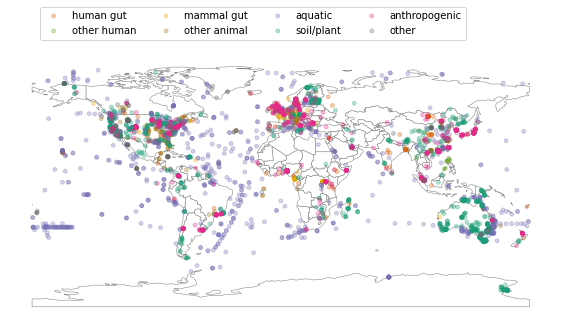

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))
countries = gpd.read_file(
    gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color='white', edgecolor='grey',linewidth=0.5,ax=ax)

for hab,c in color_map.items():
    habitats = geo.higher.to_list()
    if hab in habitats:
        sel = geo.query('higher == @hab')
        sel.plot(x="longitude", y="latitude", kind="scatter",c=[c for _ in range(len(sel))],label=hab,s=15,alpha=0.3,ax=ax)
        
ax.set_yticklabels('')
ax.set_yticks([])
ax.set_xticklabels('')
ax.set_xticks([])
ax.set(xlabel="", ylabel="")
ax.set_axis_off()

plt.legend(loc=2, bbox_to_anchor=(0.05,1.2),ncol=4)
fig.tight_layout()

In [ ]:
# calculate length (data is too large to show here)
'''
from fasta import fasta_iter

def statistic_length(infile,outfile):
    seq_length = {}
    out = open(outfile, "wt")
    for ID,seq in fasta_iter(infile):
        if len(seq) in seq_length:
            seq_length[len(seq)] += 1
        else:
            seq_length[len(seq)] = 1
    for key,value in sorted(seq_length.items()):
        out.write(str(key)+"\t"+str(value)+"\n")
    out.close()
    
def generate_his_format(infile,outfile):
    with open(outfile,"wt") as out:
        with open(infile,"rt") as f:
            for line in f:
                length,count = line.strip().split("\t")
                for i in range(int(count)):
                    out.write(length+"\n")
                    
infile1= "./data/figure1/100AA_GMSC.faa"
outfile1 = "./data/figure1/length_100.tsv"
outfile2 = "./data/figure1/his_100.txt"

infile2 = "./data/figure1/100AA_GMSC_hq.faa"
outfile3 = "./data/figure1/length_hq.tsv"
outfile4 = "./data/figure1/his_hq.txt"

infile3 = "./data/figure1/90AA_GMSC_sort.faa"
outfile5 = "./data/figure1/length_90.tsv"
outfile6 = "./data/figure1/his_90.txt"

statistic_length(infile1,outfile1)
generate_his_format(outfile1,outfile2)

statistic_length(infile2,outfile3)
generate_his_format(outfile3,outfile4)

statistic_length(infile3,outfile5)
generate_his_format(outfile5,outfile6)
'''

In [ ]:
# plot length (data is too large to show here)
'''
gmsc = pd.read_csv('./data/figure1/his_100_remove.txt',names=['length'])
family90 = pd.read_csv('./data/figure1/his_90.txt',names=['length'])
hq = pd.read_csv('./data/figure1/his_hq_remove.txt',names=['length'])

fig, ax = plt.subplots()
sns.kdeplot(data=gmsc,
            x='length',
            label='100AA',
            color='#7570b3',
            fill=True,
            bw_adjust=3,
            clip=[9,99])
sns.kdeplot(data=family90,
            x='length',
            label='90AA',
            color='#e6ab02',
            fill=True,
            bw_adjust=3,
            clip=[9,99])
sns.kdeplot(data=hq,
            x='length',
            label='High quality',
            color='#1b9e77',
            fill=True,
            bw_adjust=3,
            clip=[9,99])
plt.legend(loc=2)
plt.xlim(0,100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
'''

In [149]:
# rarefaction
habitat2color = {
        'Human gut' : (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
        'Other human' : (0.4, 0.6509803921568628, 0.11764705882352941),
        'Mammal gut' : (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
        'Other animal' : (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
        'Aquatic' : (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
        'Soil/plant' : (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
        'Anthropogenic' : (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
        'Other' : (0.4, 0.4, 0.4)
        }

In [147]:
n_perms = 24

results_dir = './data/figure1/rarefaction_results/high/'

high_envs = os.listdir(results_dir)

df_list = []

for env in high_envs:
    df = pd.concat([pd.read_csv(results_dir + env + '/perm_' + str(i) + '.tsv', sep = '\t') for i in range(n_perms)]).groupby(level=0).mean()
    df['smorfs'] = df['smorfs']/1e6
    df['env'] = env.replace('_', ' ').replace('-', '/').capitalize()

    df_list.append(df)

envs_df = pd.concat(df_list)

envs_df = envs_df.reset_index(drop=True)

human_df = envs_df[envs_df['env'] == 'Human gut']

envs_df

,k,smorfs,env
0,1.0,0.026868,Anthropogenic
1,2.0,0.043632,Anthropogenic
2,3.0,0.063154,Anthropogenic
3,4.0,0.071572,Anthropogenic
4,5.0,0.085592,Anthropogenic
...,...,...,...
63396,5634.0,369.693573,Soil/plant
63397,5635.0,369.742085,Soil/plant
63398,5636.0,369.816745,Soil/plant
63399,5637.0,369.844931,Soil/plant


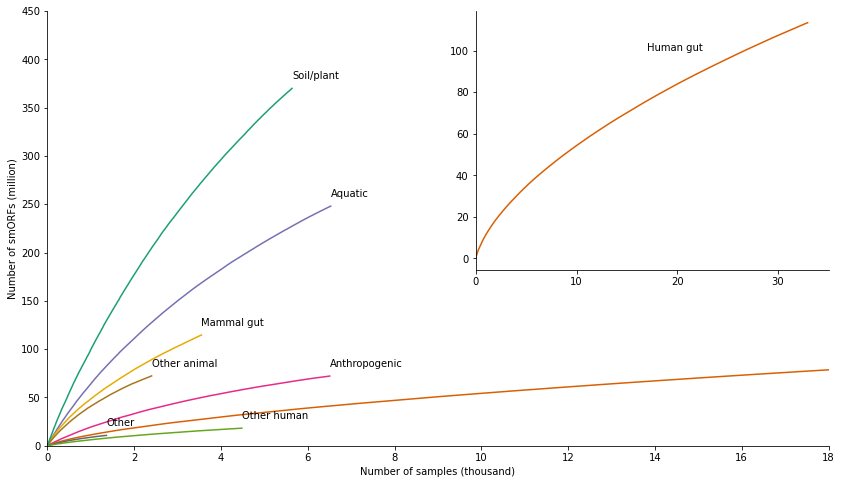

In [150]:
fig, ax = plt.subplots()

sns.lineplot(data = envs_df, x = 'k', y = 'smorfs', hue = 'env', palette = habitat2color, ax = ax)
ax.set_xlim([0, 18000])
ax.set_ylim([0, 450])
ax.set_xlabel('Number of samples (thousand)')
ax.set_ylabel('Number of smORFs (million)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: int(x/1000)))
ax.legend_.remove()

lines = envs_df.groupby('env').max()

no_plot = ['Human gut']

for line in lines.index:
     if line not in no_plot:
          plt.text(lines.loc[line]['k'], lines.loc[line]['smorfs'] + 10, line, horizontalalignment='left', size='medium', color='black')

ax2 = plt.axes([0.55, 0.43, 0.35, 0.45])

sns.lineplot(data = human_df, x = 'k', y = 'smorfs', hue = 'env', palette=habitat2color, ax = ax2)
ax2.set_xlim([0, 35000])
ax2.set(xlabel = None, ylabel = None)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend_.remove()
ax2.set_xticks(range(0, 40000, 10000))
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: int(x/1000)))

plt.text(17000, 100, 'Human gut', horizontalalignment='left', size='medium', color='black')

plt.gcf().set_size_inches(14, 8)

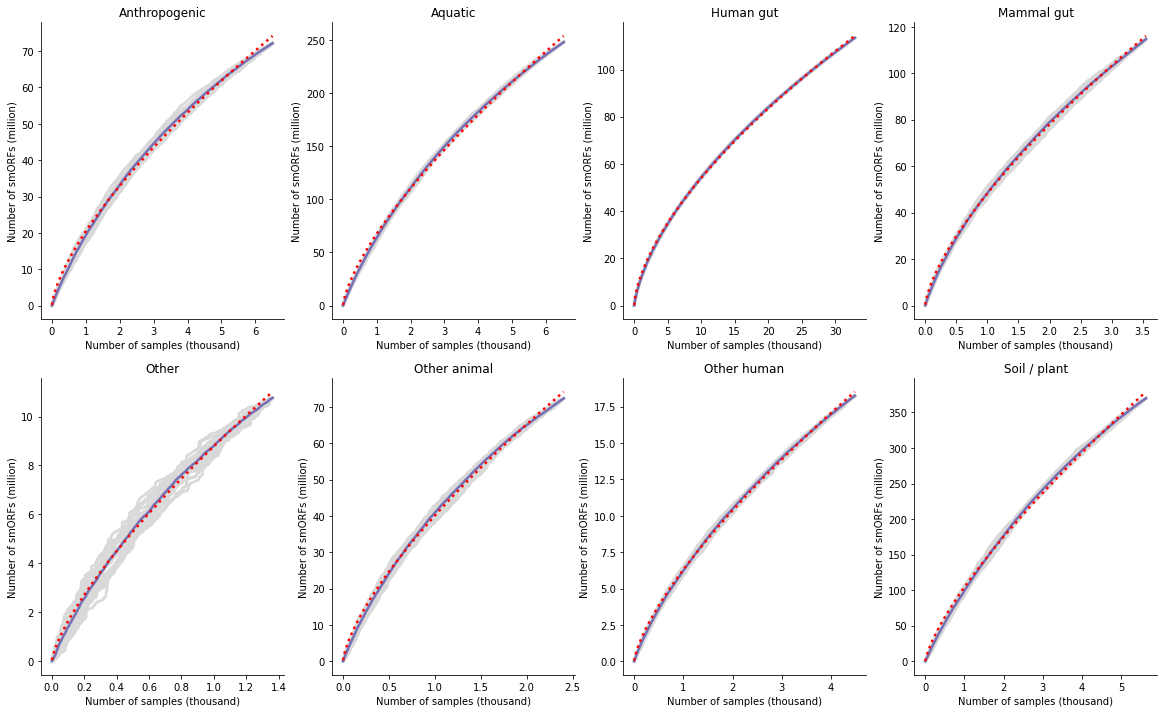

In [146]:
# Fit of Heap’s Law (N = k · sample^beta).
import numpy as np
from scipy.optimize import curve_fit

def func(x, k, b):
    return k * x**b

n_perms = 24

results_dir = './data/figure1/rarefaction_results/high/'
high_envs = os.listdir(results_dir)

fig, [(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)] = plt.subplots(2,4,figsize=(20,12))
axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
n=0

for env in high_envs:
    for i in range(n_perms):
        df = pd.read_csv(results_dir + env + '/perm_' + str(i) + '.tsv', sep = '\t')
        df['smorfs'] = df['smorfs']/1e6
        df['k'] = df['k']/1e3
        xdata = np.array(df['k'])
        ydata = np.array(df['smorfs'])
        axlist[n].plot(xdata, ydata, color='#d9d9d9',linewidth=2.5)

    df_mean = pd.concat([pd.read_csv(results_dir + env + '/perm_' + str(i) + '.tsv', sep = '\t') for i in range(n_perms)]).groupby(level=0).mean()
    df_mean['smorfs'] = df_mean['smorfs']/1e6    
    df_mean['k'] = df_mean['k']/1e3
    xdata_mean = np.array(df_mean['k'])
    ydata_mean = np.array(df_mean['smorfs'])
    
    axlist[n].plot(xdata_mean, ydata_mean, color='#7570b3',linewidth=2.5)
    popt, pcov = curve_fit(func, xdata_mean, ydata_mean)
    axlist[n].plot(xdata_mean, func(xdata_mean, *popt), color='red',linestyle=":",linewidth=2.5)
    
    axlist[n].set_ylabel('Number of smORFs (million)')
    axlist[n].set_xlabel('Number of samples (thousand)') 
    axlist[n].set_title(env.replace('_', ' ').replace('-', ' / ').capitalize())
    axlist[n].spines['right'].set_visible(False)
    axlist[n].spines['top'].set_visible(False)
    
    n+=1

In [46]:
# plot cluster distribution (data is too large to show here)

#sns.set_theme(style="ticks")
#number_df = pd.read_csv('./data/figure1/cluster_his_90.txt',header=None, names=['number'])
#g=sns.displot(number_df,
#               y="number",
#               binwidth=1,
#               kde=False,
#               color="#7570b3")
#g.set(yscale="log")
#g.set(xticklabels=[])
#g.set(xlabel="", ylabel="Number of smORFs in family")

In [14]:
def cal_total(infile,percent):
    cluster_dict = {}
    total = 0
    n = 0
    NUMBER_100 = 964970496

    with open(infile,"rt") as f:
        for line in f:
            cluster,number = line.strip().split("\t")
            cluster_dict[int(cluster)] = number
        count_list = sorted(cluster_dict.items(),key=lambda x:x[0],reverse=True)
        number = int(NUMBER_100*percent)

        for item in count_list:
            total += int(item[0])*int(item[1])
            n += int(item[1])
            if total < number:
                continue
            else:
                break

        total = total - int(item[0])*int(item[1])
        n -= int(item[1])
        n += (number - total)/int(item[0])
    return n

def result(outfile,percent_50,percent_80):
    with open(outfile,'wt') as out:
        out.write(f'Type\t50%\t80%\tother\tsingleton\n')
        SINGLETON = 136932506
        NUMBER_100 = 964970496
        NUMBER_90 = 287926875
        other_100 = NUMBER_100-SINGLETON-NUMBER_100*0.8
        other_90 = int(NUMBER_90-SINGLETON-percent_80)
        out.write(f'100AA\t{int(NUMBER_100*0.5)}\t{int(NUMBER_100*(0.8-0.5))}\t{int(other_100)}\t{SINGLETON}\n')
        out.write(f'90AA\t{int(percent_50)}\t{int(percent_80-percent_50)}\t{other_90}\t{SINGLETON}\n')

infile = './data/figure1/family_seq_90.txt'
outfile = './data/figure1/cluster.tsv'

percent_50 = cal_total(infile,0.5)
percent_80 = cal_total(infile,0.8)
result(outfile,percent_50,percent_80)

In [15]:
df = pd.read_csv('./data/figure1/cluster.tsv',sep='\t')
df

,Type,50%,80%,other,singleton
0,100AA,482485248,289491148,56061593,136932506
1,90AA,35306748,87656823,28030797,136932506


In [16]:
x = df['Type']
y1 = df['50%']/(df['singleton']+df['other']+df['50%']+df['80%'])
y2 = df['80%']/(df['singleton']+df['other']+df['50%']+df['80%'])
y3 = df['other']/(df['singleton']+df['other']+df['50%']+df['80%'])
y4 = df['singleton']/(df['singleton']+df['other']+df['50%']+df['80%'])

<BarContainer object of 2 artists>

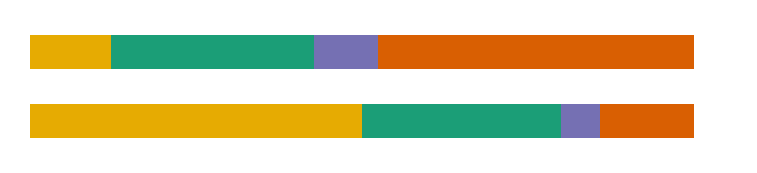

In [17]:
plt.figure(figsize=(3, 0.5),dpi=300)
plt.axis('off')
plt.barh(x,y1,height=.5,label='50%',color='#e6ab02')
plt.barh(x,y2,left=y1,height=.5,label='80%',color='#1b9e77')
plt.barh(x,y3,left=y1+y2,height=.5,label='other',color='#7570b3')
plt.barh(x,y4,left=y1+y2+y3,height=.5,label='singleton',color='#d95f02')

In [2]:
# singleton-nonsingleton
from math import log
id90 = pd.read_csv('./data/figure1/result_align_0.9.tsv',sep='\t',header=None,names=['query','target','Identity (%)','1','2','3','4','5','6','7','E-value','8'])
id90 = id90[['query','Identity (%)','E-value']]
id90['Log (E-value)'] = id90['E-value'].apply(lambda x: -log(x, 10))
id90 = id90.drop_duplicates(subset=['query'], keep='first')
id90

,query,Identity (%),E-value,Log (E-value)
0,GMSC10.SMORF.001_302_901_438,58.33,4.900000e-13,12.309804
55,GMSC10.SMORF.003_663_221_006,82.81,4.500000e-22,21.346787
93,GMSC10.SMORF.003_690_451_714,41.67,2.100000e+00,-0.322219
95,GMSC10.SMORF.001_590_549_964,38.46,6.700000e-02,1.173925
105,GMSC10.SMORF.001_586_553_550,78.08,3.600000e-27,26.443697
...,...,...,...,...
43539,GMSC10.SMORF.001_606_523_043,85.42,4.300000e-41,40.366532
43639,GMSC10.SMORF.000_783_633_519,59.15,7.400000e-17,16.130768
43739,GMSC10.SMORF.000_874_362_203,63.08,2.200000e-16,15.657577
43839,GMSC10.SMORF.000_310_359_409,74.07,2.600000e-14,13.585027


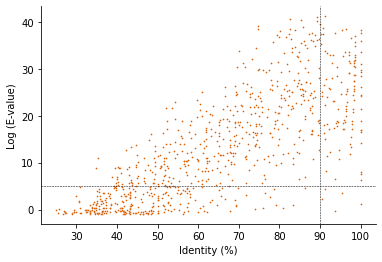

In [4]:
plt.figure()
ax = sns.scatterplot(data=id90,
                x='Identity (%)',
                y='Log (E-value)',
                color='#d95f02',
                s=3,
                alpha=1)
ax.axhline(y=-log(1e-5, 10), color='black', linestyle='dashed', linewidth=0.5)
ax.axvline(x=90, color='black', linestyle='dashed', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig(r'C:\Users\admin\Desktop\new\new\supp_fig1_a.svg')

In [10]:
# 100AA-90AA
import pandas as pd
from math import log
df = pd.read_csv('./data/figure1/selected_100AA_90AA.tsv',sep='\t',header=None,names=['query','target','Identity (%)','1','2','3','4','5','6','7','E-value','8'])
df = df[['query','Identity (%)','E-value']]
df['Log (E-value)'] = df['E-value'].apply(lambda x: -log(x, 10))
df = df.drop_duplicates(subset=['query'], keep='first')
df

,query,Identity (%),E-value,Log (E-value)
0,GMSC10.100AA.547_675_613,94.74,1.400000e-39,38.853872
1,GMSC10.100AA.549_558_809,97.62,3.200000e-20,19.494850
2,GMSC10.100AA.549_744_231,100.00,2.600000e-46,45.585027
3,GMSC10.100AA.550_485_728,96.30,9.100000e-44,43.040959
4,GMSC10.100AA.551_442_211,97.40,7.400000e-41,40.130768
...,...,...,...,...
1017,GMSC10.100AA.956_958_377,100.00,1.200000e-32,31.920819
1018,GMSC10.100AA.958_761_043,100.00,2.200000e-26,25.657577
1019,GMSC10.100AA.959_733_129,100.00,1.200000e-38,37.920819
1020,GMSC10.100AA.960_854_256,100.00,5.800000e-54,53.236572


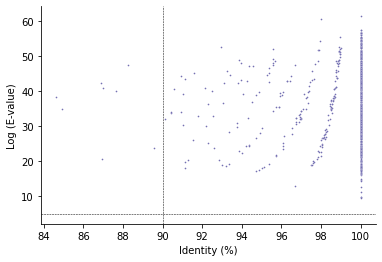

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
ax = sns.scatterplot(data=df,
                x='Identity (%)',
                y='Log (E-value)',
                color='#7570b3',
                s=3,
                alpha=1)
ax.axhline(y=-log(1e-5, 10), color='black', linestyle='dashed', linewidth=0.5)
ax.axvline(x=90, color='black', linestyle='dashed', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [3]:
df = pd.read_csv('./data/figure1/RNAcode_cutoff.csv')
df

,Threshold,Number of smORFs
0,0.05000,310952318
1,0.04000,305374843
2,0.03000,298350458
3,0.02000,288769139
4,0.01000,273029693
5,0.00500,257809620
6,0.00100,230205815
7,0.00010,194350323
8,0.00001,164477502


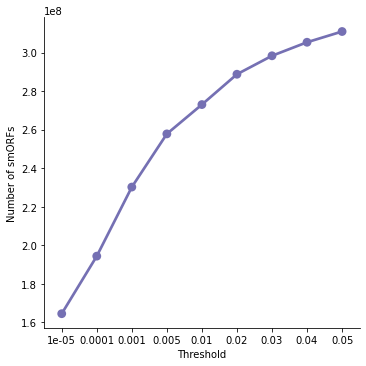

In [12]:
sns.catplot(data=df, x="Threshold", y="Number of smORFs", kind="point",color='#7570b3')

In [13]:
df = pd.read_csv('./data/figure1/metaT_cutoff.csv')
df

,Threshold,Number of smORFs
0,1,625497810
1,2,368612203
2,3,223615075
3,4,146662581
4,5,104244687
5,6,78997533
6,7,62558835
7,8,51146557
8,9,42746694
9,10,36365994


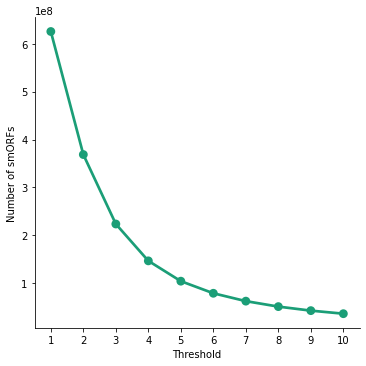

In [16]:
sns.catplot(data=df, x="Threshold", y="Number of smORFs", kind="point",color='#1b9e77')

In [17]:
df = pd.read_csv('./data/figure1/riboseq_cutoff.csv')
df

,Threshold,Number of smORFs
0,1,23967307
1,2,11432303
2,3,4986570
3,4,3380067
4,5,2511203
5,6,2120249
6,7,1808330
7,8,1605794
8,9,1437715
9,10,1302014


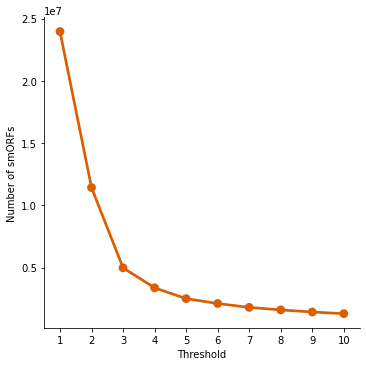

In [18]:
sns.catplot(data=df, x="Threshold", y="Number of smORFs", kind="point",color='#d95f02')

In [19]:
df = pd.read_csv('./data/figure1/metaP_cutoff.csv')
df

,Threshold,Number of smORFs
0,1.0,129661
1,0.9,786178
2,0.8,2173265
3,0.7,4398455
4,0.6,7832933
5,0.5,12949330
6,0.4,20690122
7,0.3,32547731
8,0.2,55416378
9,0.1,92774076


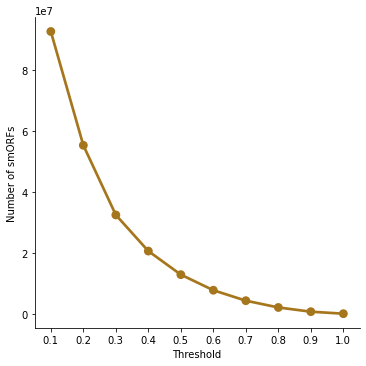

In [21]:
sns.catplot(data=df, x="Threshold", y="Number of smORFs", kind="point",color='#a6761d')

In [5]:
df = pd.read_csv('./data/figure1/quality_100AA_statistic.tsv',sep='\t',index_col=0)
df = df.T
df = df * 100 / df.sum()
df = df.T
df

,Pass,Fail,Not perform
Quality test,,,
MetaProteomic,1.325170,98.674830,0.000000
Ribo-Seq,1.184731,98.815269,0.000000
MetaTranscriptomic,38.199324,61.800676,0.000000
RNAcode,32.142218,11.310760,56.547022
AntiFam,99.795174,0.204826,0.000000
Terminal checking,41.933237,57.659130,0.407633


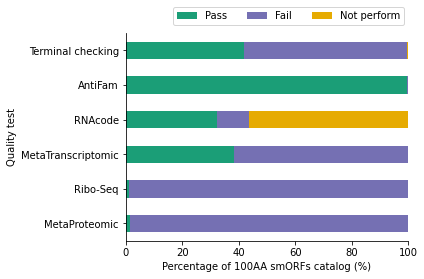

In [13]:
ax =df.plot.barh(stacked=True,color=['#1b9e77','#7570b3','#e6ab02'])
plt.xlim(0,100)
plt.xlabel('Percentage of 100AA smORFs catalog (%)')
plt.legend(['Pass','Fail','Not perform'],loc=2,bbox_to_anchor=(0.15,1.15),ncol=3)
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [14]:
df = pd.read_csv('./data/figure1/quality_90AA_statistic.tsv',sep='\t',index_col=0)
df = df.T
df = df * 100 / df.sum()
df = df.T
df

,Pass,Fail,Not perform
Quality test,,,
MetaProteomic,0.825601,99.174399,0.000000
Ribo-Seq,0.667689,99.332311,0.000000
MetaTranscriptomic,34.253058,65.746942,0.000000
RNAcode,6.357912,2.583571,91.058517
AntiFam,99.809082,0.190918,0.000000
Terminal checking,45.860738,54.139262,0.000000


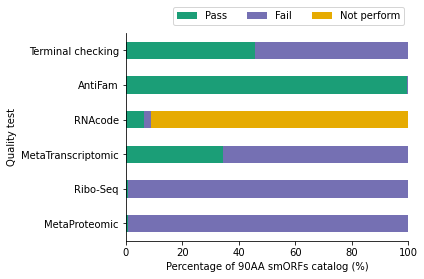

In [15]:
ax =df.plot.barh(stacked=True,color=['#1b9e77','#7570b3','#e6ab02'])
plt.xlim(0,100)
plt.xlabel('Percentage of 90AA smORFs catalog (%)')
plt.legend(['Pass','Fail','Not perform'],loc=2,bbox_to_anchor=(0.15,1.15),ncol=3)
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

([<matplotlib.patches.Wedge at 0x1b1fb084dc8>,
 [Text(-1.0999763250710728, -0.007216944168960107, 'Unknown smORFs'),
  Text(1.2499730958078468, 0.008201204579065277, 'Homologs')],
 [Text(-0.5999870864024033, -0.003936515001250967, '94.65%'),
  Text(0.749983857484708, 0.004920722747439165, '5.35%')])

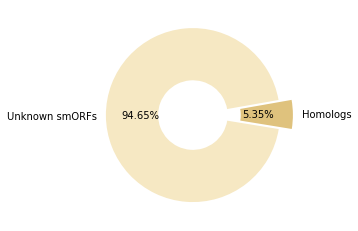

In [59]:
total_smorfs = 964970496
data = [total_smorfs - 51594261,51594261]
classes = ['Unknown smORFs', 'Homologs']
explode = [0, 0.15]
plt.pie(data,
        labels=classes,
        colors=['#f6e8c3','#dfc27d'],
        explode=explode,
        autopct='%.2f%%',
        startangle = 10,
        wedgeprops={'width': 0.6})

In [54]:
# calculate propotion of homologs in sberro's clusters (the same as refseq, data is too large to show here)
def cal_homolog(infile1,infile2):
    with open(infile1,'rt') as f:
        homolog = len(f.readlines())
    with open(infile2,'rt') as f:
        count = 0
        for line in f:
            if line.startswith('>'):
                count += 1
    print(homolog/count*100)
    
infile1 = './data/figure1/sbero_cluster_qdedup.tsv'
infile2 = './data/figure1/sbero_cluster.faa'
cal_homolog(infile1,infile2)

67.34383656041832


In [13]:
df = pd.read_csv('./data/figure1/overlap.csv')
df['Database'].tolist()

['Refseq Bacteria', 'Refseq Archaea', "Sbero's clusters", "Sbero's families"]

Text(0, 0.5, 'Proportion of homologs (%)')

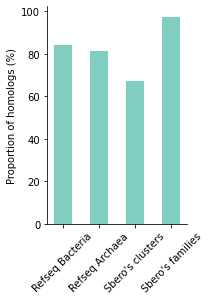

In [14]:
fig, ax = plt.subplots(figsize=(2.5,4))
x = df['Database']
y1 = df['Non-homolog']
y2 = df['Homolog']
plt.bar(x,y2,color='#80cdc1',width=0.5,label='Homolog')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.ylabel('Proportion of homologs (%)')

In [6]:
df = pd.read_csv('./data/figure1/homolog.csv')
df['Non_isolate'] = df['All']-df['Isolate']
df

,Homolog,Human,Non_human,Isolate,All,Non_isolate
0,Homolog to sberro's clusters,85.01,14.43,0.56,100,99.44
1,Non-homolog to sberro's clusters,13.17,86.61,0.22,100,99.78
2,Homolog to sberro's families,89.53,9.85,0.62,100,99.38
3,Non-homolog to sberro's families,13.41,86.37,0.22,100,99.78
4,All 100AA smORFs,13.41,86.37,0.22,100,99.78


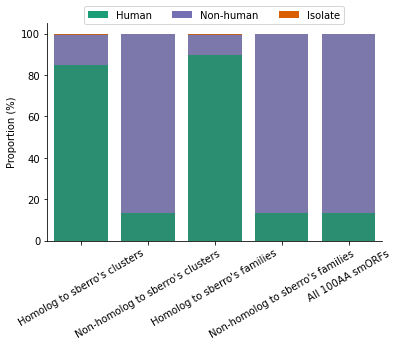

In [14]:
fig, ax = plt.subplots()
sns.barplot(x = df.Homolog, y = df.All, color = '#d95f02')
medium_plot = sns.barplot(x = df.Homolog, y = df.Non_isolate, color = '#7570b3')
bottom_plot = sns.barplot(x = df.Homolog, y = df.Human, color = '#1b9e77')

bottom_plot.set_xticklabels(df.Homolog, rotation=30)
bottom_plot.set_ylabel("Proportion (%)")
bottom_plot.set_xlabel("")
topbar = plt.Rectangle((0,0),1,1,fc="#1b9e77", edgecolor = 'none')
mediumbar = plt.Rectangle((0,0),1,1,fc="#7570b3", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#d95f02',  edgecolor = 'none')
plt.legend([topbar,mediumbar, bottombar], ['Human','Non-human','Isolate'], loc=1, ncol = 3, bbox_to_anchor=(0.9,1.1))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(r'C:\Users\admin\Desktop\new\new\supp_fig4_b.svg')

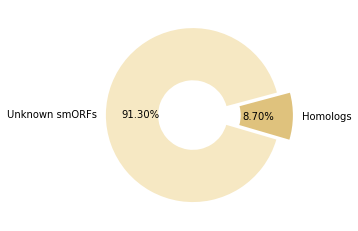

In [83]:
# high quality
total_smorfs = 43617914
data = [total_smorfs - 3796490,3796490]
classes = ['Unknown smORFs', 'Homologs']
explode = [0, 0.15]
plt.pie(data,
        labels=classes,
        colors=['#f6e8c3','#dfc27d'],
        explode=explode,
        autopct='%.2f%%',
        startangle = 15,
        wedgeprops={'width': 0.6})

Text(0, 0.5, 'Proportion of homologs (%)')

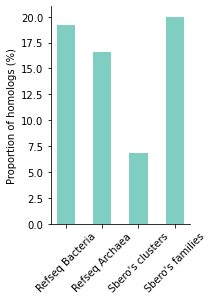

In [15]:
fig, ax = plt.subplots(figsize=(2.5,4))
x = ['Refseq Bacteria', 'Refseq Archaea', "Sbero's clusters", "Sbero's families"]
y = [19.24,16.57,6.85,20]
plt.bar(x,y,color='#80cdc1',width=0.5,label='Homolog')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.ylabel('Proportion of homologs (%)')

In [16]:
df = pd.read_csv('./data/figure1/database.csv')
df['Homolog fraction'] = df['mapped']/df['all']*100
df['Non-homolog fraction'] = 100-df['Homolog fraction']
df

,Database,all,mapped,Homolog fraction,Non-homolog fraction
0,NMPFamsDB,56786,53833,94.799775,5.200225
1,FesNov,630375,602591,95.592465,4.407535
2,SmProt2,788586,214590,27.211997,72.788003
3,OpenProt2.0,1781907,106736,5.989987,94.010013
4,sORFs.org,4377422,600776,13.724425,86.275575


Text(0, 0.5, 'Proportion of homologs (%)')

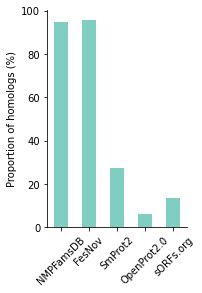

In [17]:
fig, ax = plt.subplots(figsize=(2.5,4))
x = df['Database']
y = df['Homolog fraction']
plt.bar(x,y,color='#80cdc1',width=0.5,label='Homolog')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.ylabel('Proportion of homologs (%)')